# 기술 통계<a href="#기술-통계" class="anchor-link">¶</a>

In \[1\]:

    import numpy as np
    from scipy import stats
    x = np.random.randint(1, 10, 20)

## 중심 통계량: 데이터의 중심경향을 나타내는 수치<a href="#중심-통계량:-데이터의-중심경향을-나타내는-수치" class="anchor-link">¶</a>

-   \[평균(Average)\]: 표본데이터의 중심무게 (산술평균, 기하평균,
    조화평균, 가중평균)
-   \[중앙값(Median)\]: 순서를 가진 표본데이터의 가운데(50%)에 위치한 값
-   \[최빈값(Mode)\]: 표본데이터 중 가장 빈번한 값

### 평균<a href="#평균" class="anchor-link">¶</a>

In \[2\]:

    np.mean(x)

Out\[2\]:

    5.05

### 중앙값<a href="#중앙값" class="anchor-link">¶</a>

In \[3\]:

    np.median(x)

Out\[3\]:

    5.0

### 최빈값<a href="#최빈값" class="anchor-link">¶</a>

In \[4\]:

    stats.mode(x)

Out\[4\]:

    ModeResult(mode=array([1]), count=array([5]))

## 변동 통계량: 데이터의 변동성을 나타내는 수치<a href="#변동-통계량:-데이터의-변동성을-나타내는-수치" class="anchor-link">¶</a>

-   범위(Range): 최대값과 최소값의 차이
-   편차(Deviation): 관측값과 평균의 차이
-   변동(Variation): 편차 제곱의 합
-   분산(Variance): 편차 제곱의 합을 데이터의 수로 나눈 값
-   표준편차(Standard Deviation): \$\\sqrt{분산}\$

### 범위<a href="#범위" class="anchor-link">¶</a>

In \[5\]:

    np.max(x) - np.min(x)

Out\[5\]:

    8

### 편차 및 변동<a href="#편차-및-변동" class="anchor-link">¶</a>

In \[6\]:

    deviation = x - np.mean(x)
    variation = sum(deviation ** 2)

### 분산 및 표준편차<a href="#분산-및-표준편차" class="anchor-link">¶</a>

In \[7\]:

    np.var(x)

Out\[7\]:

    10.0475

In \[8\]:

    np.std(x)

Out\[8\]:

    3.1697791721190924

### 사분위수<a href="#사분위수" class="anchor-link">¶</a>

In \[9\]:

    np.quantile(x, 0.25)

Out\[9\]:

    1.75

In \[10\]:

    np.quantile(x, 0.5)

Out\[10\]:

    5.0

## 형태 통계량: 데이터의 분포형태와 왜곡을 나타내는 수치<a href="#형태-통계량:-데이터의-분포형태와-왜곡을-나타내는-수치" class="anchor-link">¶</a>

-   왜도(Skewness): 평균을 중심으로 좌우로 데이터가 편향되어 있는 정도
-   첨도(Kurtosis): 뾰족함 정도
-   이상치(Outlier): 오류로 판단하는 값이지만 기준이 불명확

### 왜도<a href="#왜도" class="anchor-link">¶</a>

In \[11\]:

    stats.skew(x)

Out\[11\]:

    -0.017496978366576602

### 첨도<a href="#첨도" class="anchor-link">¶</a>

In \[12\]:

    stats.kurtosis(x)

Out\[12\]:

    -1.5873447850750733

### 아웃라이어 (IQR)<a href="#아웃라이어-(IQR)" class="anchor-link">¶</a>

In \[13\]:

    def outlier_detection(x, w = 1.5):
        Q1 = np.quantile(x, 0.25)
        Q3 = np.quantile(x, 0.75)
        IQR = Q3 - Q1
        
        return np.logical_or(Q1 - w * IQR > x, Q3 + w * IQR < x)

In \[14\]:

    x[-1] = 100
    outlier_detection(x)

Out\[14\]:

    array([False, False, False, False, False, False, False, False, False,
           False, False, False, False, False, False, False, False, False,
           False,  True])

# 가설 검정<a href="#가설-검정" class="anchor-link">¶</a>

## 예시 및 정리<a href="#예시-및-정리" class="anchor-link">¶</a>

**\> 이해문제1: 양치기들이 거짓말쟁이인가?**

1\) 가설설정

> -   대중주장: 현재 대한민국에 있는 양치기들은 일반인 대비 거짓말을
>     많이 하지 않는다!
> -   나의주장: 현재 대한민국에 있는 양치기들은 일반인 대비 거짓말을
>     많이 한다!

2\) 점추정 및 구간추정

> -   검정통계량(점추정):
>     \${샘플집단\~\~양치기\~\~거짓말\~\~빈도\~\~-\~\~샘플집단\~\~일반인\~\~거짓말\~\~빈도
>     \\over 샘플집단\~\~양치기\~\~거짓말\~\~빈도\~\~표준편차}\$ (1회성)
> -   신뢰구간(구간추정): 실험을 여러번 반복해서
>     거짓말차이(검정통계량)의 히스토그램 또는 분포 (반복성)

3\) 유의수준 및 유의확률

> -   유의수준: (대중주장이 참인 가정에서, 검정통계량 값으로 나의주장이
>     맞다 오판할 확률)  
>     : 양치기와 일반인이 거짓말 차이가 없다는 전제에서, 양치기들이
>     일반인보다 거짓말 빈도가 많다 오판할 확률
> -   유의확률: (대중주장이 참인 가정에서, 검정통계량 값으로 나의주장이
>     관찰될 확률)  
>     : 양치기와 일반인이 거짓말 차이가 없다는 전제에서, 양치기들이
>     일반인보다 거짓말 빈도가 많이 관찰될 확률

4\) 의사결정: (유의수준 5%기준)

> -   나의주장 참: 5%보다 작은 경우를 희박한 상황이라고 할때, 나의
>     데이터에서 나의주장이 관찰될 확률(3%)은 희박한 결과를 발견하였으니
>     양치기들은 거짓말쟁이!
> -   대중주장 참: 5%보다 작은 경우를 희박한 상황이라고 할때, 나의
>     데이터에서 나의주장이 관찰될 확률(7%)은 희박하지 않은 결과를
>     발견한 것이라 양치기들은 거짓말쟁이가 아님!

## 등분산 검정<a href="#등분산-검정" class="anchor-link">¶</a>

p-value가 낮으면 두 집단 이상의 분산 차이가 존재

In \[15\]:

    from scipy.stats import levene
    a = np.random.normal(100, 1, 1000)
    b = np.random.normal(100, 1, 1000)
    print(np.var(a), np.var(b))

    stat, p = levene(a, b)

    stat, p

    0.9495532722877262 0.9388640228588699

Out\[15\]:

    (0.14584944355485033, 0.7025743724379527)

In \[16\]:

    from scipy.stats import levene
    a = np.random.normal(100, 1, 1000)
    b = np.random.normal(100, 10, 1000)
    print(np.var(a), np.var(b))

    stat, p = levene(a, b)
    stat, p

    1.0119085593907093 102.18348806931758

Out\[16\]:

    (1392.0039029661868, 1.173402793950097e-231)

In \[17\]:

    from scipy.stats import levene
    a = np.random.normal(100, 1, 1000)
    b = np.random.normal(100, 1, 1000)
    c = np.random.normal(100, 10, 1000)
    print(np.var(a), np.var(b), np.var(c))

    stat, p = levene(a, b, c)
    stat, p

    0.9073400620556052 0.9886939995274929 94.88913973945444

Out\[17\]:

    (1323.832703547323, 0.0)

## 독립 표본 t-test<a href="#독립-표본-t-test" class="anchor-link">¶</a>

-   p-value가 낮으면 두 집단의 평균 차이가 있음
-   반드시 등분산 검정 후에 사용할 것

scipy.stats.ttest_ind(a, b, axis=0, equal_var=True,
nan_policy='propagate', permutations=None, random_state=None,
alternative='two-sided', trim=0)

-   equal_var: bool, optional

          If True (default), perform a standard independent 2 sample test that assumes equal population variances  If False, perform Welch’s t-test, which does not assume equal population variance.

-   nan_policy{‘propagate’, ‘raise’, ‘omit’}, optional

    -   propagate : returns nan
    -   raise : throws an error
    -   omit: performs the calculations ignoring nan values

In \[18\]:

    a = np.random.normal(10, 1, 100)
    b = np.random.normal(10, 1, 100)

    stats.ttest_ind(a, b, equal_var = True)

Out\[18\]:

    Ttest_indResult(statistic=-1.0212913849532985, pvalue=0.30836261766994366)

In \[19\]:

    a = np.random.normal(10, 1, 100)
    b = np.random.normal(10, 10, 100)

    stats.ttest_ind(a, b, equal_var = False)

Out\[19\]:

    Ttest_indResult(statistic=-0.10412516501227907, pvalue=0.9172757349774978)

In \[20\]:

    a = np.random.normal(10, 1, 100)
    b = np.random.normal(15, 1, 100)

    stats.ttest_ind(a, b, equal_var = True)

Out\[20\]:

    Ttest_indResult(statistic=-35.174278369876816, pvalue=4.164635776493295e-87)

## paired t-test<a href="#paired-t-test" class="anchor-link">¶</a>

scipy.stats.ttest_rel(a, b, axis=0, nan_policy='propagate',
alternative='two-sided')  
Calculate the t-test on TWO RELATED samples of scores, a and b.

-   a와 b의 shape가 반드시 일치해야 함

In \[21\]:

    a = np.random.normal(10, 1, 100)
    b = a + np.random.normal(0, 1, 100)

    stats.ttest_rel(a, b)

Out\[21\]:

    Ttest_relResult(statistic=0.9906563880929291, pvalue=0.3242685134244955)

## 정규성 검정<a href="#정규성-검정" class="anchor-link">¶</a>

-   p-value가 0.05 이상인 경우에는 정규분포를 따른다고 봐도 무방함

In \[22\]:

    # 정규 분포를 따르는 경우
    from scipy import stats
    x = np.random.normal(100, 10, 100)
    k2, p = stats.normaltest(x)
    print(p)

    0.16440012751371216

In \[23\]:

    # 정규 분포를 따르지 않는 경우
    from scipy import stats
    x = np.random.random(10000)
    k2, p = stats.normaltest(x)
    print(p)

    0.0

## 일원분산분석<a href="#일원분산분석" class="anchor-link">¶</a>

-   정규성 검정을 한 뒤에 수행할 것 (정규성 만족못하면 Kruskal-Wallis H
    Test 수행)

In \[24\]:

    import pandas as pd
    import numpy as np
    import statsmodels.formula.api as smf
    import statsmodels.api as sm
    from statsmodels.stats.anova import AnovaRM
    from scipy import stats

In \[25\]:

    # 데이터 준비
    # information on experimental design
    group_list = ['control','patient1','patient2']
    subs_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']

    # read data into dataframe
    df_1way = pd.DataFrame(columns=["group", "my_value"])
    my_row = 0
    for ind_g, group in enumerate(group_list):
        for sub in subs_list:
            # generate random value here as example
            my_val = np.random.normal(ind_g, 1, 1)[0]
            df_1way.loc[my_row] = [group, my_val]
            my_row = my_row + 1

In \[26\]:

    df_1way.head()

Out\[26\]:

|     | group   | my_value  |
|-----|---------|-----------|
| 0   | control | 0.907117  |
| 1   | control | 0.471981  |
| 2   | control | 0.148081  |
| 3   | control | 0.318889  |
| 4   | control | -0.049459 |

### statsmodel을 활용<a href="#statsmodel을-활용" class="anchor-link">¶</a>

In \[27\]:

    # generate model for linear regression
    my_model = smf.ols(formula='my_value ~ group', data=df_1way)

    # fit model to data to obtain parameter estimates
    my_model_fit = my_model.fit()

    # show anova table
    anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
    print(anova_table)

    # group - F, PR (p-value)만 확인하면 됨

                 sum_sq    df          F    PR(>F)
    group     19.105558   2.0  15.193014  0.000038
    Residual  16.976555  27.0        NaN       NaN

### scipy stats을 활용<a href="#scipy-stats을-활용" class="anchor-link">¶</a>

In \[28\]:

    F, p = stats.f_oneway(df_1way[df_1way['group'] == 'control'].my_value, df_1way[df_1way['group'] == 'patient1'].my_value, df_1way[df_1way['group'] == 'patient2'].my_value)
    print(F, p)

    15.193013869948365 3.797760762024205e-05

## 이원분산분석 & 교호작용분석<a href="#이원분산분석-&amp;-교호작용분석" class="anchor-link">¶</a>

In \[29\]:

    # information on experimental design
    group_list = ['control','patient1','patient2']
    language_list = ['English', 'German', 'French']
    subs_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']

    # read data into dataframe
    df_2way = pd.DataFrame(columns=["group", "language", "my_value"])
    my_row = 0
    for ind_g, group in enumerate(group_list):
        for ind_l, lan in enumerate(language_list):
            for sub in subs_list:
                    # generate random value here as example
                    my_val = np.random.normal(ind_g + ind_l, 1, 1)[0]
                    df_2way.loc[my_row] = [group, lan, my_val]
                    my_row = my_row + 1

    df_2way.head()

Out\[29\]:

|     | group   | language | my_value  |
|-----|---------|----------|-----------|
| 0   | control | English  | 0.246734  |
| 1   | control | English  | 1.052874  |
| 2   | control | English  | -0.474547 |
| 3   | control | English  | -0.769478 |
| 4   | control | English  | -0.372473 |

In \[30\]:

    # fit model to data to obtain parameter estimates
    # formula = Y ~ 인자 * 인자
    my_model_fit = smf.ols(formula='my_value ~ group * language', data=df_2way).fit()


    # show anova table
    print(sm.stats.anova_lm(my_model_fit, typ=2))

    # group, language은 유효
    # group*language의 p-value는 0.25로 유효하지 않음 --> 두 독립 변수의 교호작용은 없음!

                       sum_sq    df          F        PR(>F)
    group           82.481682   2.0  42.847287  2.022200e-13
    language        49.828294   2.0  25.884623  2.033270e-09
    group:language   9.053971   4.0   2.351662  6.091095e-02
    Residual        77.963119  81.0        NaN           NaN

## kruskal test (정규성 검정 실패시, 사용하는 One-way ANOVA)<a href="#kruskal-test-(정규성-검정-실패시,-사용하는-One-way-ANOVA)" class="anchor-link">¶</a>

scipy.stats.kruskal(sample1,sample2,...)

-   p value가 작을수록 차이가 있음

In \[31\]:

    from scipy import stats
    x = [1, 3, 5, 7, 9]
    y = [2, 4, 6, 8, 10]
    stats.kruskal(x, y)

Out\[31\]:

    KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)

In \[32\]:

    from scipy import stats
    x = [1,2,3,4,5]
    y = [1,2,3,4,5]
    z = [1,2,3,4,5]
    stats.kruskal(x, y,z)

Out\[32\]:

    KruskalResult(statistic=0.0, pvalue=1.0)

## 교차 분석<a href="#교차-분석" class="anchor-link">¶</a>

p가 작을수록 독립

In \[33\]:

    from scipy.stats import chi2_contingency
    df = pd.DataFrame({'Gender' : ['M', 'M', 'M', 'F', 'F'] * 10,
                       'isSmoker' : ['Smoker', 'Smoker', 'Smoker', 'Non-Smoker', 'Non-Smoker'] * 10
                      })
    df.head()

Out\[33\]:

|     | Gender | isSmoker   |
|-----|--------|------------|
| 0   | M      | Smoker     |
| 1   | M      | Smoker     |
| 2   | M      | Smoker     |
| 3   | F      | Non-Smoker |
| 4   | F      | Non-Smoker |

In \[34\]:

    contigency= pd.crosstab(df['Gender'], df['isSmoker']) 
    contigency

Out\[34\]:

| isSmoker | Non-Smoker | Smoker |
|----------|------------|--------|
| Gender   |            |        |
| F        | 20         | 0      |
| M        | 0          | 30     |

In \[35\]:

    # Chi-square test of independence. 
    c, p, dof, expected = chi2_contingency(contigency) 
    # Print the p-value
    print(p)

    1.2317319065658562e-11

## 상관분석<a href="#상관분석" class="anchor-link">¶</a>

In \[36\]:

    from scipy.stats import pearsonr
    from scipy.stats import spearmanr

    x1 = np.random.random(100)
    x2 = np.random.random(100)

    print(pearsonr(x1, x2))
    print(spearmanr(x1, x2))

    (-0.009913368485027201, 0.922019862002112)
    SpearmanrResult(correlation=-0.016393639363936393, pvalue=0.8713954941535211)

## 요인분석 및 주성분분석<a href="#요인분석-및-주성분분석" class="anchor-link">¶</a>

sklearn.decomposition.FactorAnalysis(n_components=None, \*, tol=0.01,
copy=True, max_iter=1000, noise_variance_init=None,
svd_method='randomized', iterated_power=3, rotation=None,
random_state=0)

sklearn.decomposition.PCA(n_components=None, \*, copy=True,
whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto',
random_state=None)

# 회귀분석<a href="#회귀분석" class="anchor-link">¶</a>

## 데이터 준비<a href="#데이터-준비" class="anchor-link">¶</a>

In \[37\]:

    import statsmodels.api as sm

    X = pd.DataFrame(np.random.random((100, 5)), columns = ["X1", "X2", "X3", "X4", "X5"])
    Y = X["X1"] + X["X2"] + np.random.random(100) / 10

## 회귀모델 기초<a href="#회귀모델-기초" class="anchor-link">¶</a>

### 모델링<a href="#모델링" class="anchor-link">¶</a>

In \[38\]:

    X = sm.add_constant(X) # adding a constant (1로만 구성된 변수가 추가됨)

    model = sm.OLS(Y, X).fit() # Y, X 순서임을 확인
    predictions = model.predict(X)  # X에 대한 예측치 (Series)

    print_model = model.summary()
    print(print_model)

                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:                      y   R-squared:                       0.995
    Model:                            OLS   Adj. R-squared:                  0.995
    Method:                 Least Squares   F-statistic:                     3816.
    Date:                Thu, 19 Aug 2021   Prob (F-statistic):          7.06e-107
    Time:                        14:34:29   Log-Likelihood:                 217.82
    No. Observations:                 100   AIC:                            -423.6
    Df Residuals:                      94   BIC:                            -408.0
    Df Model:                           5                                         
    Covariance Type:            nonrobust                                         
    ==============================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
    ------------------------------------------------------------------------------
    const          0.0437      0.013      3.425      0.001       0.018       0.069
    X1             0.9952      0.010     98.338      0.000       0.975       1.015
    X2             1.0091      0.011     91.522      0.000       0.987       1.031
    X3            -0.0045      0.010     -0.438      0.663      -0.025       0.016
    X4             0.0084      0.010      0.799      0.426      -0.012       0.029
    X5             0.0061      0.010      0.613      0.541      -0.014       0.026
    ==============================================================================
    Omnibus:                       27.854   Durbin-Watson:                   2.298
    Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.636
    Skew:                          -0.051   Prob(JB):                       0.0597
    Kurtosis:                       1.841   Cond. No.                         9.08
    ==============================================================================

    Notes:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

### 해석 필요<a href="#해석-필요" class="anchor-link">¶</a>

-   Standard error가 가지는 의미: The standard error is an estimate of
    the standard deviation of the coefficient, the amount it varies
    across cases. It can be thought of as a measure of the precision
    with which the regression coefficient is measured.
-   P>\|t\|: p-value (0.05미만이면 유의)
-   \[0.025 0.975\]: 신뢰 구간
-   Prob (F-statistic): the probability that the null hypothesis for the
    full model is true (i.e., that all of the regression coefficients
    are zero)

## 회귀모델 가정 검토<a href="#회귀모델-가정-검토" class="anchor-link">¶</a>

### 선형성<a href="#선형성" class="anchor-link">¶</a>

-   응답 변수가 예측 변수와 선형 회귀 계수의 선형 조합으로 표현 가능함을
    의미
-   상관계수, scatter plot으로 검정

#### scatter plot<a href="#scatter-plot" class="anchor-link">¶</a>

In \[39\]:

    from matplotlib import pyplot as plt
    fig = plt.figure(figsize = (6, 10))
    for i in range(1, 6):
        plt.subplot(3, 2, i)
        plt.title("X{}~Y".format(i))
        plt.scatter(X["X{}".format(i)], Y)
    fig.tight_layout()

#### 상관계수<a href="#상관계수" class="anchor-link">¶</a>

In \[40\]:

    from scipy import stats
    for i in range(1, 6):
        print(i, stats.pearsonr(X["X" + str(i)], Y)[0])

    1 0.7169488074770946
    2 0.6999618891342666
    3 -0.1159727038320417
    4 0.12254363846193096
    5 -0.09733277938669578

### 독립성<a href="#독립성" class="anchor-link">¶</a>

-   다중공선성이 없어야 함
-   다중공선성을 일으키는 변수 (VIF 10이상)를 제거하거나, 변수선택법을
    이용하여 해결

In \[41\]:

    from statsmodels.stats.outliers_influence import variance_inflation_factor
    pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

Out\[41\]:

    const    20.407675
    X1        1.002517
    X2        1.097224
    X3        1.042954
    X4        1.057066
    X5        1.036779
    dtype: float64

### 잔차 등분산성<a href="#잔차-등분산성" class="anchor-link">¶</a>

#### 잔차 그림<a href="#잔차-그림" class="anchor-link">¶</a>

In \[42\]:

    # 잔차가 -0.06부터 0.06까지 고르게 퍼져 있음 
    # 정상적인 잔차그림은 0을 중심으로 에측 값에 관계없이 일정 범위 내에서 특정한 패턴을 가지지 않게 분포됩니다.
    res = model.resid
    plt.scatter(range(len(res)), res.values)

Out\[42\]:

    <matplotlib.collections.PathCollection at 0x17f1cf60c88>

![](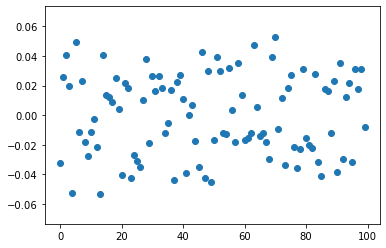%0A)

#### Bresuch-Pagan test<a href="#Bresuch-Pagan-test" class="anchor-link">¶</a>

-   The null hypothesis (H0): Homoscedasticity (등분산성) is present
-   The alternative hypothesis: (Ha): Homoscedasticity is not present

In \[43\]:

    from statsmodels.compat import lzip
    import statsmodels.stats.api as sms

    names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

    test = sms.het_breuschpagan(model.resid, model.model.exog)
    lzip(names, test)

    # p-value가 0.05 미만이 아니므로, 등분산성이 존재한다고 볼 수 있음
    # 등분산성 가정을 만족하지 않으면 제곱항 추가, 변수 변환 등 고려가 필요

Out\[43\]:

    [('Lagrange multiplier statistic', 4.379630030338111),
     ('p-value', 0.49614819719458125),
     ('f-value', 0.8610826814043929),
     ('f p-value', 0.5103673804157989)]

### 잔차 정규성<a href="#잔차-정규성" class="anchor-link">¶</a>

In \[44\]:

    # 정규 분포를 따르지 않음
    from scipy import stats
    k2, p = stats.normaltest(res)
    print(p)

    8.946146855803877e-07

### 잔차 독립성<a href="#잔차-독립성" class="anchor-link">¶</a>

-   durbin_watson 테스트: 1.5와 2.5 사이에 있으면 정상

In \[45\]:

    from statsmodels.stats.stattools import durbin_watson

    #perform Durbin-Watson test
    durbin_watson(model.resid)

Out\[45\]:

    2.298391259795813

## 변수선택법<a href="#변수선택법" class="anchor-link">¶</a>

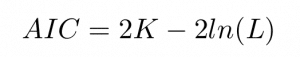  

-   K is the number of independent variables used
-   L is the log-likelihood estimate (a.k.a. the likelihood that the
    model could have produced your observed y-values).

### 전진선택법<a href="#전진선택법" class="anchor-link">¶</a>

In \[46\]:

    def processSubset(X,y,feature_set):
        model = sm.OLS(y,X[list(feature_set)]) # Modeling
        regr = model.fit() # model fitting
        AIC = regr.aic # model's AIC
        return {"model" : regr, "AIC" : AIC}

In \[47\]:

    def forward(X,y,predictors):
        # predictor - 현재 선택되어있는 변수

        remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
        results = []
        for p in remaining_predictors :
            results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))

        models = pd.DataFrame(results)
        
        # AIC가 가장 낮은 것을 선택
        best_model = models.loc[models['AIC'].argmin()]
        print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0].aic)
        return best_model
        
    ### 전진선택법 모델
    def forward_model(X,y):
        Fmodels = pd.DataFrame(columns=["AIC","model"])
        
        # 미리 정의된 데이터 변수
        predictors = []
        
        for i in range(1,len(X.columns.difference(['const']))+1):
            Forward_result = forward(X=X,y=y,predictors=predictors)
            if i > 1 :
                if Forward_result["AIC"] > Fmodel_before:
                    break
            Fmodels.loc[i] = Forward_result
            predictors = Fmodels.loc[i]["model"].model.exog_names
            Fmodel_before = Fmodels.loc[i]["AIC"]
            predictors = [k for k in predictors if k != 'const']

        return Fmodels['model'][len(Fmodels['model'])]

In \[48\]:

    # 상수가 반드시 포함되어 있어야 함: X = sm.add_constant(X) 
    print(forward_model(X,Y).summary())

    Selected predictors: ['X1', 'const'] AIC:  27.990661502147674
    Selected predictors: ['X1', 'X2', 'const'] AIC:  -428.4013516846708
    Selected predictors: ['X1', 'X2', 'X4', 'const'] AIC:  -426.98009592720234
                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:                      y   R-squared:                       0.995
    Model:                            OLS   Adj. R-squared:                  0.995
    Method:                 Least Squares   F-statistic:                     9721.
    Date:                Thu, 19 Aug 2021   Prob (F-statistic):          1.77e-112
    Time:                        14:34:30   Log-Likelihood:                 217.20
    No. Observations:                 100   AIC:                            -428.4
    Df Residuals:                      97   BIC:                            -420.6
    Df Model:                           2                                         
    Covariance Type:            nonrobust                                         
    ==============================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
    ------------------------------------------------------------------------------
    X1             0.9947      0.010     99.345      0.000       0.975       1.015
    X2             1.0109      0.010     96.949      0.000       0.990       1.032
    const          0.0481      0.007      6.643      0.000       0.034       0.063
    ==============================================================================
    Omnibus:                       37.979   Durbin-Watson:                   2.315
    Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.300
    Skew:                          -0.048   Prob(JB):                       0.0428
    Kurtosis:                       1.774   Cond. No.                         5.30
    ==============================================================================

    Notes:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

### 후진선택법<a href="#후진선택법" class="anchor-link">¶</a>

In \[49\]:

    import itertools
    def backward(X,y,predictors):
        results = []
        
        # 데이터 변수들이 미리 정의된 predictors 조합 확인
        
        for combo in itertools.combinations(predictors, len(predictors) - 1):
            results.append(processSubset(X=X,y=y,feature_set=list(combo)+['const']))
        models = pd.DataFrame(results)
        
        # 가장 낮은 AIC를 가진 모델을 선택
        best_model = models.loc[models['AIC'].argmin()]
        
        print("Selected predictors:",best_model['model'].model.exog_names,' AIC:',best_model[0].aic)
        return best_model
        
    def backward_model(X,y) :
        Bmodels = pd.DataFrame(columns=["AIC","model"], index = range(1,len(X.columns)))
        predictors = X.columns.difference(['const'])
        Bmodel_before = processSubset(X,y,predictors)['AIC']
        while (len(predictors) > 1):
            Backward_result = backward(X=X, y= y,predictors=predictors)
            if Backward_result['AIC'] > Bmodel_before :
                break
            Bmodels.loc[len(predictors) -1] = Backward_result
            predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
            Bmodel_before = Backward_result["AIC"]
            predictors = [k for k in predictors if k != 'const']
        return (Bmodels["model"].dropna().iloc[0])

In \[50\]:

    # 상수가 반드시 포함되어 있어야 함: X = sm.add_constant(X) 
    print(backward_model(X,Y).summary())

    Selected predictors: ['X1', 'X2', 'X4', 'X5', 'const']  AIC: -425.44443485780164
    Selected predictors: ['X1', 'X2', 'X4', 'const']  AIC: -426.98009592720234
    Selected predictors: ['X1', 'X2', 'const']  AIC: -428.4013516846708
    Selected predictors: ['X1', 'const']  AIC: 27.990661502147674
                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:                      y   R-squared:                       0.995
    Model:                            OLS   Adj. R-squared:                  0.995
    Method:                 Least Squares   F-statistic:                     9721.
    Date:                Thu, 19 Aug 2021   Prob (F-statistic):          1.77e-112
    Time:                        14:34:30   Log-Likelihood:                 217.20
    No. Observations:                 100   AIC:                            -428.4
    Df Residuals:                      97   BIC:                            -420.6
    Df Model:                           2                                         
    Covariance Type:            nonrobust                                         
    ==============================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
    ------------------------------------------------------------------------------
    X1             0.9947      0.010     99.345      0.000       0.975       1.015
    X2             1.0109      0.010     96.949      0.000       0.990       1.032
    const          0.0481      0.007      6.643      0.000       0.034       0.063
    ==============================================================================
    Omnibus:                       37.979   Durbin-Watson:                   2.315
    Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.300
    Skew:                          -0.048   Prob(JB):                       0.0428
    Kurtosis:                       1.774   Cond. No.                         5.30
    ==============================================================================

    Notes:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

### 단계적 선택법<a href="#단계적-선택법" class="anchor-link">¶</a>

In \[51\]:

    def Stepwise_model(X,y):
        Stepmodels = pd.DataFrame(columns = ["AIC","model"])
        predictors = []
        Smodel_before = processSubset(X,y,predictors + ['const'])['AIC']
        
        # 변수 1~10개 0-9 -> 1-10
        for i in range(1,len(X.columns.difference(['const']))+1):
            Forward_result = forward(X=X,y=y,predictors = predictors) # constant added
            Stepmodels.loc[i] = Forward_result
            
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            predictors = [k for k in predictors if k != 'const']
            Backward_result = backward(X=X,y=y,predictors = predictors)
            if Backward_result["AIC"] < Forward_result["AIC"]:
                Stepmodels.loc[i] = Backward_result
                predictors = Stepmodels.loc[i]["model"].model.exog_names
                Smodel_before = Stepmodels.loc[i]["AIC"]
                predictors = [k for k in predictors if k != "const"]
                print('backward')
            if Stepmodels.loc[i]["AIC"] > Smodel_before:
                break
            else :
                Smodel_before = Stepmodels.loc[i]["AIC"]
        return Stepmodels["model"][len(Stepmodels["model"])]

In \[52\]:

    print(Stepwise_model(X,Y).summary())

    Selected predictors: ['X1', 'const'] AIC:  27.990661502147674
    Selected predictors: ['const']  AIC: 98.14853540392605
    Selected predictors: ['X1', 'X2', 'const'] AIC:  -428.4013516846708
    Selected predictors: ['X1', 'const']  AIC: 27.990661502147674
    Selected predictors: ['X1', 'X2', 'X4', 'const'] AIC:  -426.98009592720234
    Selected predictors: ['X1', 'X2', 'const']  AIC: -428.4013516846708
    backward
    Selected predictors: ['X1', 'X2', 'X4', 'const'] AIC:  -426.98009592720234
    Selected predictors: ['X1', 'X2', 'const']  AIC: -428.4013516846708
    backward
    Selected predictors: ['X1', 'X2', 'X4', 'const'] AIC:  -426.98009592720234
    Selected predictors: ['X1', 'X2', 'const']  AIC: -428.4013516846708
    backward
                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:                      y   R-squared:                       0.995
    Model:                            OLS   Adj. R-squared:                  0.995
    Method:                 Least Squares   F-statistic:                     9721.
    Date:                Thu, 19 Aug 2021   Prob (F-statistic):          1.77e-112
    Time:                        14:34:30   Log-Likelihood:                 217.20
    No. Observations:                 100   AIC:                            -428.4
    Df Residuals:                      97   BIC:                            -420.6
    Df Model:                           2                                         
    Covariance Type:            nonrobust                                         
    ==============================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
    ------------------------------------------------------------------------------
    X1             0.9947      0.010     99.345      0.000       0.975       1.015
    X2             1.0109      0.010     96.949      0.000       0.990       1.032
    const          0.0481      0.007      6.643      0.000       0.034       0.063
    ==============================================================================
    Omnibus:                       37.979   Durbin-Watson:                   2.315
    Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.300
    Skew:                          -0.048   Prob(JB):                       0.0428
    Kurtosis:                       1.774   Cond. No.                         5.30
    ==============================================================================

    Notes:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

## 다항 회귀<a href="#다항-회귀" class="anchor-link">¶</a>

class sklearn.preprocessing.PolynomialFeatures(degree=2, \*,
interaction_only=False, include_bias=True, order='C')

For example, if an input sample is two dimensional and of the form \[a,
b\], the degree-2 polynomial features are \[1, a, b, a^2, ab, b^2\].

In \[53\]:

    from sklearn.preprocessing import PolynomialFeatures
    polynomial_features= PolynomialFeatures(degree=2, interaction_only = False)

    A = pd.DataFrame({"X1":[1,2,3], "X2":[2,3,4]})
    xp = polynomial_features.fit_transform(A)
    xp.shape # bias, X1, X2, X1^2, X2^2, X1X2

    # xp로 모델링하면 됨

Out\[53\]:

    (3, 6)

# 로지스틱 회귀 분석<a href="#로지스틱-회귀-분석" class="anchor-link">¶</a>

## 데이터 준비<a href="#데이터-준비" class="anchor-link">¶</a>

In \[54\]:

    from sklearn.datasets import make_classification
    X,Y = make_classification(n_features = 5) 

## 기초<a href="#기초" class="anchor-link">¶</a>

-   Pseudo R-squ. is a substitute for R-squared. It also measures the
    amount of outcome variable variance, which is explained by the
    model. Pseudo R-squared can be interpreted in the same way as
    R-squared; the higher the better, with a maximum of 1.

-   LL-null and LLR p-value are equivalent to the F-statistic and
    F-proba of linear regression, and are interpreted in the same manner
    for comparing models. The higher the value for LL-null the better.
    Low values for LLR p-value (\<0.05) mean you can reject the null
    hypothesis that the model based on the intercept (all coefficients
    = 0) is better than the full model. Hence, our model is relevant.

-   The z-statistic plays the same role as the t-statistic in the linear
    regression output and equals the coefficient divided by its standard
    error. The lower, the better.

In \[55\]:

    from statsmodels.discrete.discrete_model import Logit
    model = Logit(Y, X) 
    model = model.fit()
    print(model.summary())

    Optimization terminated successfully.
             Current function value: 0.138469
             Iterations 9
                               Logit Regression Results                           
    ==============================================================================
    Dep. Variable:                      y   No. Observations:                  100
    Model:                          Logit   Df Residuals:                       96
    Method:                           MLE   Df Model:                            3
    Date:                Thu, 19 Aug 2021   Pseudo R-squ.:                  0.8002
    Time:                        14:34:31   Log-Likelihood:                -13.847
    converged:                       True   LL-Null:                       -69.315
    Covariance Type:            nonrobust   LLR p-value:                 6.902e-24
    ==============================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
    ------------------------------------------------------------------------------
    x1             0.6468        nan        nan        nan         nan         nan
    x2             0.2020        nan        nan        nan         nan         nan
    x3             4.5396    7.6e+06   5.97e-07      1.000   -1.49e+07    1.49e+07
    x4             0.5489      0.546      1.005      0.315      -0.522       1.620
    x5            -1.9118   1.26e+07  -1.52e-07      1.000   -2.47e+07    2.47e+07
    ==============================================================================